**Задание 1**

1) Используя средства модуля [pandas](https://github.com/dm-fedorov/python3_intro/blob/master/lesson_13/pandas.ipynb), определите среднюю, максималную, минимальную зарплату и среднюю, максималную, минимальную пенсию в Санкт-Петербурге в 2018 году.

2) Продемонстрируйте умение построения графиков (для произвольных значений) с помощью plot.


**Задание 2**

Для [файла](http://dfedorov.spb.ru/python3/forecast.html), расположенного в сети Интернет, напишите сценарий с использованием [модуля bs4](https://github.com/dm-fedorov/python3_intro/blob/master/lesson_13/bs4.ipynb), который извлекает данные и сохраняет их в файле формата CSV, где первый столбец - день недели, второй столбец - погода. 

**Переходим к решению первой задачи:**

Импортируем модуль pandas:

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Читаем содержимое csv файла:

In [155]:
data = pd.read_csv('opendata.csv', encoding='cp1251')
data.head()

,name,region,date,value
0,Количество заявок на потребительские кредиты,Россия,2013-01-15,571147
1,Количество заявок на потребительские кредиты,Россия,2013-02-15,504508
2,Количество заявок на потребительские кредиты,Россия,2013-03-15,628803
3,Количество заявок на потребительские кредиты,Россия,2013-04-15,836054
4,Количество заявок на потребительские кредиты,Россия,2013-05-15,867235


In [156]:
a = data[data['name'] == 'Средняя зарплата'][data['region'] == 'Санкт-Петербург'][data['date'] >'2017-12-31']

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [157]:
print('Средняя зарплата: ',a.value.mean())
print('Максимальная зарплата: ',max(a.value))
print('Минимальная зарплата: ',min(a.value))

Средняя зарплата:  43176.454545454544
Максимальная зарплата:  49700
Минимальная зарплата:  31599


In [158]:
b = data[data['name'] == 'Средняя пенсия'][data['region'] == 'Санкт-Петербург'][data['date'] >'2017-12-31']

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [159]:
print('Средняя пенсия: ',b.value.mean())
print('Максимальная пенсия: ',max(b.value))
print('Минимальная пенсия: ',min(b.value))

Средняя пенсия:  17023.454545454544
Максимальная пенсия:  19922
Минимальная пенсия:  14694


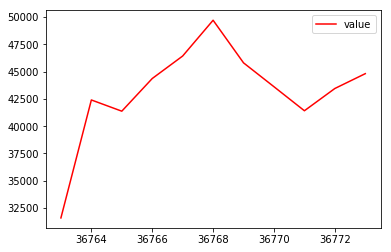

In [160]:
a.plot(color='red')

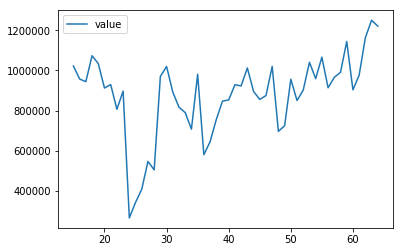

In [161]:
data[15:65].plot()

In [162]:
h = [i for i in a["value"]]
k = [i for i in b["value"]]

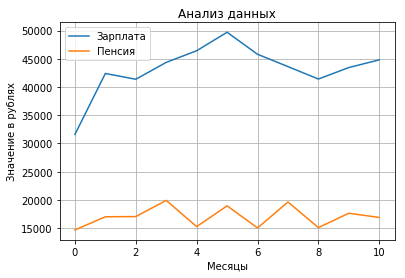

In [163]:
import matplotlib.pyplot as plt
import numpy as np

# Способ 1 с помощью label
plt.plot(h, label = u'Зарплата')
plt.plot(k, label = u'Пенсия')

plt.grid(True)
plt.xlabel(u'Месяцы')
plt.ylabel(u'Значение в рублях')
plt.title(u'Анализ данных')

plt.legend()

plt.show()

**Переходим к решению второй задачи:**

In [164]:
import bs4

In [165]:
def read_url(url):
    import urllib.request    
    with urllib.request.urlopen(url) as webpage:
        text = webpage.read().decode('utf-8')
    return text

In [166]:
text = read_url("http://dfedorov.spb.ru/python3/forecast.html")
text

'<html>\n  <body>\n    <div class="row row-forecast">\n        <div class="forecast-label"><b>Сегодня ночью</b></div>\n        <div class="forecast-text">Небольшая вероятность ливней и гроз до 22:00. Облачно с прояснениями около 66. Ветер юго-западный около 9 миль в час. Вероятность осадков 20%. Возможны новые осадки от десятой до четверти дюйма.</div>\n    </div>\n    <div class="row row-forecast">\n        <div class="forecast-label"><b>Пятница</b></div>\n        <div class="forecast-text">Местами солнечно. Высоко около 77, с температурами, падающими приблизительно к 75 днем. Северо-западный ветер от 7 до 12 миль в час, с порывами до 18 миль в час.</div>\n    </div>\n    <div class="row row-forecast">\n        <div class="forecast-label"><b>Ночь пятницы</b></div>\n        <div class="forecast-text">Облачно с прояснениями около 63. Северный ветер от 7 до 10 миль в час.</div>\n    </div>\n    <div class="row row-forecast">\n        <div class="forecast-label"><b>Суббота</b></div>\n    

In [167]:
bs = bs4.BeautifulSoup(text, 'html.parser')

In [168]:
c=bs.get_text()

In [169]:
d=c.split('\n')

In [170]:
e=list(filter(None, d))

In [171]:
t=[]
for i in range(0,len(e),2):
    t.append([e[i],e[i+1]])

In [173]:
import csv
with open('weatherlab.csv', "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerows(t)